In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import math

import time

from datetime import date # Removed duplicate import of datetime
import calendar

import nltk
nltk.download() # Commented out, as it may prompt a download dialog

import string
import regex # Removed duplicate import of re
import re

from nltk.corpus import stopwords
from pprint import pprint

import spacy

import contractions

# Text to emotion 
import nltk
nltk.download('punkt') # Moved download to correct location

import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

from LeXmo import LeXmo

import tqdm
from tqdm import tqdm_notebook,tqdm

from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

import operator

# Increase display options for Pandas dataframes
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
pd.options.display.max_colwidth = 10000
pd.options.display.max_seq_items = 2000


[nltk_data] Downloading package punkt to /Users/fuzzysha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/fuzzysha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# read datasets
df_news_true=pd.read_csv('data/DataSet_Misinfo_TRUE.csv',index_col=False)
df_news_fake=pd.read_csv('data/DataSet_Misinfo_FAKE.csv')
df_news_rpsub=pd.read_csv('data/EXTRA_RussianPropagandaSubset.csv')

In [7]:
# Separate each paragraph into sentences using nltk.sent_tokenize
df_sentences=pd.DataFrame(columns=['sent'])
list_token=[]
for para in tqdm(df_news_true.text):
    if pd.isna(para)==False:
        tokens = nltk.sent_tokenize(para)
        list_token=list_token+tokens

# print the number of sentences        
print("we have {} sentences in the Text".format(len(list_token)))

# Print the number of unique sentences       
print("we have {} unique sentences in the Text".format(len(set(list_token))))

#convert the list of sentences into dataframe 
df_sentence =pd.DataFrame([set(list_token)]).T

# Rename the column
df_sentence.columns=['sent']

# Print the first sentence
print ( "The first sentence is:")
print(df_sentence.loc[1,'sent'] )

100%|██████████| 34975/34975 [02:38<00:00, 220.10it/s]


we have 821955 sentences in the Expereince
we have 787223 unique sentences in the Expereince
The first sentence is:
” It has had close to 900, 000 views.


In [8]:
# Add columns for each emotion to the df_sentence DataFrame
df_sentence['anger']=0
df_sentence['anticipation']=0
df_sentence['disgust']=0
df_sentence['fear']=0
df_sentence['joy']=0
df_sentence['negative']=0
df_sentence['positive']=0
df_sentence['sadness']=0
df_sentence['surprise']=0
df_sentence['trust']=0

# Fix contractions like "I'm" to "I am"
df_sentence['sent_cont_fixed']=''
for i,row in df_sentence.iterrows():
    df_sentence.loc[i,'sent_cont_fixed']=contractions.fix(row.sent)
    
# Make a copy of the df_sentence DataFrame
df_sentence_new=df_sentence.copy()

In [ ]:
# For each sentence in the df_sentence_new DataFrame, calculate the related emotions using LeXmo
for i,row in tqdm_notebook(df_sentence_new.iterrows()):
    # Use LeXmo on the fixed version of the sentence to avoid contraction issues
    emo=(LeXmo.LeXmo(row.sent_cont_fixed))
    # Remove the 'text' key from the dictionary, which contains the original sentence
    emo.pop('text', None)
    # Fill the values in the DataFrame for each emotion
    for key,value in emo.items():
        df_sentence_new.loc[i,key]=round(value,3)  

In [15]:
#save the database with the emotion for each sentence
# df_sentence_new.to_hdf('data/df_news_true_emotions.h5', key='df_news_true_emotions')

In [109]:
#116,371 Sentences
df_sentence_new_=df_sentence_new.iloc[:1000,:]

In [110]:
df_freq_by_emotion={}

df_freq_by_emotion['anger']=len(df_sentence_new_[df_sentence_new_['anger']>0])
df_freq_by_emotion['anticipation']=len(df_sentence_new_[df_sentence_new_['anticipation']>0])
df_freq_by_emotion['disgust']=len(df_sentence_new_[df_sentence_new_['disgust']>0])
df_freq_by_emotion['fear']=len(df_sentence_new_[df_sentence_new_['fear']>0])
df_freq_by_emotion['joy']=len(df_sentence_new_[df_sentence_new_['joy']>0])
df_freq_by_emotion['negative']=len(df_sentence_new_[df_sentence_new_['negative']>0])
df_freq_by_emotion['positive']=len(df_sentence_new_[df_sentence_new_['positive']>0])
df_freq_by_emotion['sadness']=len(df_sentence_new_[df_sentence_new_['sadness']>0])
df_freq_by_emotion['surprise']=len(df_sentence_new_[df_sentence_new_['surprise']>0])
df_freq_by_emotion['trust']=len(df_sentence_new_[df_sentence_new_['trust']>0])


df_freq_by_emotion=pd.DataFrame.from_dict(df_freq_by_emotion,orient='index').reset_index()

df_freq_by_emotion.columns=['emotion','emotion_freq']

df_freq_by_emotion.sort_values('emotion_freq', ascending=False)

,emotion,emotion_freq
6,positive,566
9,trust,520
5,negative,452
1,anticipation,377
3,fear,294
0,anger,259
7,sadness,259
8,surprise,252
4,joy,241
2,disgust,109


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[(0.0, 910.0),
 Text(4.444444444444445, 0.5, ''),
 Text(0.5, 25.078125, 'Faculties | Continuing students')]

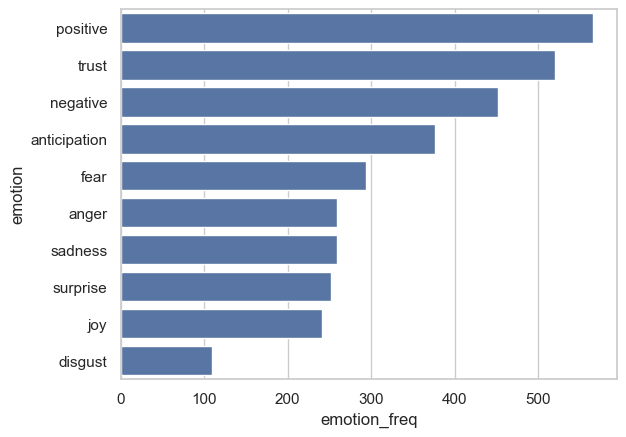

In [111]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df_freq_by_emotion, 
            y=df_freq_by_emotion.emotion,
            x=df_freq_by_emotion.emotion_freq,
            order=df_freq_by_emotion.sort_values('emotion_freq', ascending=False).emotion,
            color='C0'
           
           
           )
# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(8, 6))

ax.legend(ncol=1, loc="lower right", frameon=True, title='March prefered')
ax.set(xlim=(0, 910), ylabel="", xlabel="Faculties | Continuing students")
